        220930_exnode_5image
        
        1. 데이터준비 
        2. 네트워크 설계 
            Sequential API는Functional API 밑바닥부터 직접 코딩하는 방법
             tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예
        3. 딥러닌 학습
            model.fit(x-train
        4. 검증
            x_test
        5. 다른 방법
        

In [7]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

mnist = keras.datasets.mnist

(x_train,y_train),(x_test,y_test)= mnist.load_data()

print(len(x_train))

2.6.0
60000


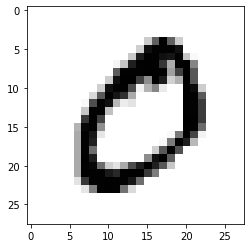

In [9]:
# MNIST 데이터셋의 X항목(위 코드에서는 x_train, x_test)은 이미지 데이터를 담은 행렬(matrix)입니다.
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [10]:
# Y항목에는 어떤 값
print(y_train[1])

0


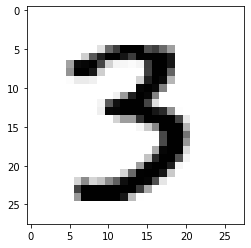

10001  번째 이미지의 숫자는 바로  3 입니다.


In [13]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index = 10000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1),  ' 번째 이미지의 숫자는 바로 ' , y_train[index] , '입니다.')

In [14]:
#학습용 데이터는 과연 몇 장
print(x_train.shape)

(60000, 28, 28)


In [15]:
#시험용 데이터의 개수를 
print(x_test.shape)

(10000, 28, 28)


In [17]:
#. MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위
print('최소값:',np.min(x_train), '최대값:', np.max(x_train))

최소값: 0 최대값: 255


In [20]:
#입력은 0~1 사이의 값으로 정규화
x_train_norm, x_test_norm = x_train / 255.0 , x_test / 255.0
print('최소값: ', np.min(x_train_norm), '최대값 : ', np.max(x_train_norm))

최소값:  0.0 최대값 :  1.0


In [21]:
#tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예
#    손글씨 숫자 분류기를 구현
model = keras.models.Sequential()    # 객체화 
model.add(keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32,activation = 'relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

print('model에 추가된 layre 갯수 :  ',len(model.layers))

model에 추가된 layre 갯수 :   7


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [25]:
#(60000, 28, 28, 1) 로 만들어 주어야 합니다 
print(f'before reshape - x_train_norm shape : {x_train_norm.shape}')
print(f'before reshape - x_test_norm shape : {x_test_norm.shape}')

x_train_reshaped = x_train_norm.reshape(-1,28,28,1)
x_test_reshaped = x_test_norm.reshape(-1,28,28,1)

print(f'before reshape - x_train_norm shape : {x_train_norm.shape}')
print(f'before reshape - x_test_norm shape : {x_test_norm.shape}')



before reshape - x_train_norm shape : (60000, 28, 28)
before reshape - x_test_norm shape : (10000, 28, 28)
before reshape - x_train_norm shape : (60000, 28, 28)
before reshape - x_test_norm shape : (10000, 28, 28)


In [28]:
#딥러닝 네트워크를 학습
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2029 - accuracy: 0.9383
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0676 - accuracy: 0.9792
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0498 - accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0394 - accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0327 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0231 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0199 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0159 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.014

In [29]:
#테스트 데이터로 성능을
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f'test_loss : {test_loss}')
print(f'test_accuracy : {test_accuracy}')

313/313 - 1s - loss: 0.0331 - accuracy: 0.9901
test_loss : 0.03312592953443527
test_accuracy : 0.9901000261306763


In [32]:
#model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력
predicted_result = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predicted_result,axis=1)

idx=0 
print('model.predicted() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능서이 높은 결과 : ' , predicted_labels[idx])
print('실제 데이터의 라벨 : ' , y_test[idx])

model.predicted() 결과 :  [6.6617760e-11 4.0940416e-09 7.5711250e-07 7.8295488e-06 5.9214238e-11
 3.0888098e-11 2.6822491e-14 9.9999130e-01 8.9512314e-10 8.1403314e-08]
model이 추론한 가장 가능서이 높은 결과 :  7
실제 데이터의 라벨 :  7


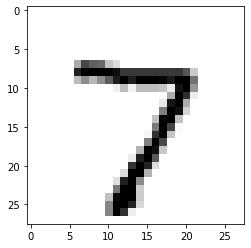

In [33]:
#정말 숫자 7인가요?
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포 : [1.01340454e-07 5.95544516e-05 4.35442998e-05 2.14170690e-08
 2.26928994e-01 2.64333244e-09 6.65941457e-07 1.69282069e-03
 7.59176314e-01 1.20979985e-02]
라벨 : 4,예측결과: 8


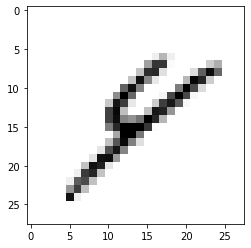

예측확률분포 : [1.51492696e-13 8.08976412e-01 1.58276490e-03 4.23675887e-02
 3.64353880e-03 2.70408691e-06 2.56193244e-09 1.43138304e-01
 1.15882714e-04 1.72897402e-04]
라벨 : 7,예측결과: 1


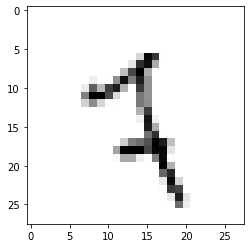

예측확률분포 : [5.4671958e-11 1.1334104e-07 2.5346232e-04 1.5432765e-07 6.3252124e-09
 5.0388303e-02 1.5513085e-01 3.5467455e-11 7.9422712e-01 2.8350594e-13]
라벨 : 6,예측결과: 8


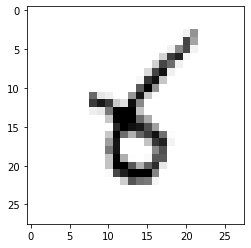

예측확률분포 : [1.01340454e-07 5.95544516e-05 4.35442998e-05 2.14170690e-08
 2.26928994e-01 2.64333244e-09 6.65941457e-07 1.69282069e-03
 7.59176314e-01 1.20979985e-02]
라벨 : 4,예측결과: 8


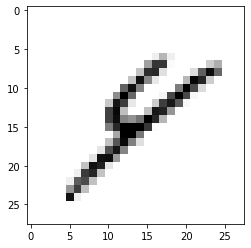

예측확률분포 : [9.00184333e-01 5.44266854e-11 1.04628384e-07 5.82153908e-11
 1.28544037e-10 1.46662546e-06 9.97631624e-02 4.43501451e-11
 4.97760811e-05 1.17551565e-06]
라벨 : 6,예측결과: 0


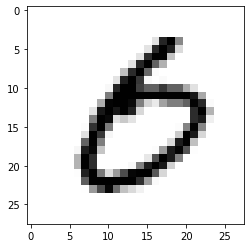

In [37]:
#model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우
import random 
wrong_predict_list=[]
for i , _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
samples = random.choices(population = wrong_predict_list, k=5)

for n in samples:
    print('예측확률분포 : ' + str(predicted_result[n]))
    print('라벨 : ' + str(y_test[n]) + ',예측결과: ' + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap = plt.cm.binary)
    plt.show()

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")